# Reinforcement Learning - Monte Carlo

## Introduction

Monte Carlo method  for estimating **value functions** and discovering **optimal policies**.

Previous knowledge:

- Markov Decision Processes (MDP)
- Dynamic Programming (DP)


- Python for Data Scientist
- Notebooks


## Content

1. Summary of prerequisites
2. Introduction
3. Monte Carlo Prediction
4. Monte Carlo of Estimation Action Value
5. Monte Carlo Control

# 1. Summary of prerequisites

## 1.1. Markov Devision Processes (MDP)


Main elements diagram that conform a RL problem:

<img src="images/diagram_elements.png" style="width:500px">



**Dynamics of MDP**
$$p(s', r | s, a) \doteq \mathbf{Pr} \{S_t = s', R_{t} = r | S_{t-1} = s, A_{t-1} = a\} \label{eq:3.1}$$

**Return**
$$G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + … = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}$$


**Value function**
$$ v_{\pi}(s) \doteq \mathbb{E}_{\pi}[G_t | S_t = s] = \mathbb{E}_{\pi} \Bigg[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1} \Bigg| S_t = s\Bigg] $$

**Action-value function**
$$q_{\pi}(s) \doteq \mathbb{E}_{\pi}[G_t | S_t = s, A_t = a] = \mathbb{E}_{\pi} \Bigg[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1} \Bigg| S_t = s, A_t = a\Bigg]$$

**Bellman equation for the value function**

$$\begin{array}{rcl}
v_{\pi}(s) & = & \displaystyle \sum_{a} \pi(a|s) q_{\pi}(s,a)\\
& = & \displaystyle \sum_{a} \pi(a|s) \sum_{s',r} p(s',r|s,a) \Big[r + \gamma v_{\pi}(s') \Big]\\
\end{array}$$


<img src="images/backup_v.png" style="width:200px">


**Belman equation for the action-value function**

$$\begin{array}{rcl}
q_{\pi}(s,a)& = & \displaystyle \sum_{s',r} p(s',r|s,a) \Big[r + \gamma v_{\pi}(s')\Big]\\
& = & \displaystyle \sum_{s',r} p(s',r|s,a) \Big[r + \gamma \sum_{a'} \pi(a'|s') q_{\pi}(s',a') \Big]\\
\end{array}$$

<img src="images/backup_q.png" style="width:200px">

## 1.2. Policy Iteration (DP)

We’re trying to find optimal policy using policy iteration with one sweep of policy evaluation

$$\pi_0 \overset{E}{\rightarrow} v_{\pi_0} \overset{I}{\rightarrow} \pi_1 \overset{E}{\rightarrow} v_{\pi_1} \overset{I}{\rightarrow} \pi_2 \overset{E}{\rightarrow} ... \overset{I}{\rightarrow} \pi_* \overset{E}{\rightarrow} v_{\pi_*}$$


Generalized Policy Iteration:

<img src="images/gpi_interaction.png" style="width:450px">

# 2. Introduction


What is a Monte Carlo Method?

Any method which solves a problem by generating suitable random numbers and observing that fraction of the numbers obeying some property or properties.


In [1]:
"""Pi Monte Carlo Estimation
"""

import math
import random


def distance_euclidean (x1, y1 ,x2, y2):
    distance = math.sqrt((x1 - x2)**2 + (y1 -y2)**2) 
    return distance



def generate_random(n_val):
    point_list = []
    for x in range(n_val):
        x = random.randint(-10000,10000)
        y = random.randint(-10000,10000)
        
        point_list.append([x,y])
    return point_list


inside = 0
outside = 0
n_val = int(input("\nEnter the number of points that will be generated: "))

points = generate_random(n_val)

for i in points:

    if distance_euclidean(i[0],i[1], 0,0) <= 10000:
        inside = inside +1

print ('%0.10f' % (4*inside / (n_val)))


Enter the number of points that will be generated: 5000
3.1664000000


## **Pi Monte Carlo Estimation**
<img src="images/piMonteCarlo.png" style="width:500px">

Reference: https://medium.com/@dagmara.zdybal/estimation-of-pi-using-monte-carlo-method-in-python-62a93a2acbc0

MC method for estimating value functions and discovering optimal policies.
Keys:

1. Tabular method: sequences of states, actions, and rewards
2. MModel-free: no knowledege of MDP transitions
3. Average rewards for each action and only on the **completion of an episode** (no bootstrapping) are value estimates and policies changed
4. Based on the Policy Iteration of Dynamic Programming, but from computing to learning. **Experience**
5. **Value = mean(return)**
6. Process: the predicion problem, the policy improvement and the control problem


# 3. Monte Carlo Prediction

**Learning the state-value function for a given policy**

<img src="images/first_visit.png" style="width:800px">

MC policy evaluation uses **empirical** mean return instead of expected return

We can apply backup diagrams to Monte Carlo methods. Contrary to backup diagrams for DP methods, we go all the way to the end of the episode, and we show only the sampled transitions instead of all possible transitions

The estimate for each state in Monte Carlo methods is independent from estimates of other states. In other words, Monte Carlo methods do not bootstrap.

<img src="images/mc_backup.png" style="width:50px">

## Example

* Undiscounted Markov Reward Process
* Two states A and B
* Observed two samples episodes

$$A+3{\rightarrow} A+2{\rightarrow} B-4 {\rightarrow} A+2 {\rightarrow} B-1 {\rightarrow} terminate $$
$$B+1{\rightarrow} A+4{\rightarrow} A-1 {\rightarrow} B+2 {\rightarrow} terminate $$


1. Using first-visit, state value function of A and B?
2. Using every-visit, state value function of A and B?

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

## Example Black Jack

In [5]:
# actions: hit or stand
ACTION_HIT = 0
ACTION_STAND = 1  #  "strike" in the book
ACTIONS = [ACTION_HIT, ACTION_STAND]

# policy for player
POLICY_PLAYER = np.zeros(22, dtype=np.int)
for i in range(12, 20):
    POLICY_PLAYER[i] = ACTION_HIT
POLICY_PLAYER[20] = ACTION_STAND
POLICY_PLAYER[21] = ACTION_STAND


# policy for dealer
POLICY_DEALER = np.zeros(22)
for i in range(12, 17):
    POLICY_DEALER[i] = ACTION_HIT
for i in range(17, 22):
    POLICY_DEALER[i] = ACTION_STAND

# function form of target policy of player
def target_policy_player(usable_ace_player , player_sum, dealer_card):
    return POLICY_PLAYER[player_sum]

# function form of behavior policy of player
def behavior_policy_player(usable_ace_player, player_sum, dealer_card):
    if np.random.binomial(1, 0.5) == 1:
        return ACTION_STAND
    return ACTION_HIT
    
# get a new card
def get_card():
    card = np.random.randint(1, 14)
    card = min(card, 10)
    return card
    
    
# get the value of a card (11 for ace).
def card_value(card_id):
    return 11 if card_id == 1 else card_id
    
# play a game
# @policy_player: specify policy for player
# @initial_state: [whether player has a usable Ace, sum of player's cards, one card of dealer]
# @initial_action: the initial action
def play(policy_player, initial_state=None, initial_action=None):
    # player status

    # sum of player
    player_sum = 0

    # trajectory of player
    player_trajectory = []

    # whether player uses Ace as 11
    usable_ace_player = False

    # dealer status
    dealer_card1 = 0
    dealer_card2 = 0
    usable_ace_dealer = False

    if initial_state is None:
        # generate a random initial state

        while player_sum < 12:
            # if sum of player is less than 12, always hit
            card = get_card()
            player_sum += card_value(card)

            # If the player's sum is larger than 21, he may hold one or two aces.
            if player_sum > 21:
                assert player_sum == 22
                # last card must be ace
                player_sum -= 10
            else:
                usable_ace_player |= (1 == card)

        # initialize cards of dealer, suppose dealer will show the first card he gets
        dealer_card1 = get_card()
        dealer_card2 = get_card()

    else:
        # use specified initial state
        usable_ace_player, player_sum, dealer_card1 = initial_state
        dealer_card2 = get_card()

    # initial state of the game
    state = [usable_ace_player, player_sum, dealer_card1]

    # initialize dealer's sum
    dealer_sum = card_value(dealer_card1) + card_value(dealer_card2)
    usable_ace_dealer = 1 in (dealer_card1, dealer_card2)
    # if the dealer's sum is larger than 21, he must hold two aces.
    if dealer_sum > 21:
        assert dealer_sum ==22
        # use one Ace as 1 rather than 11
        dealer_sum -= 10
    assert dealer_sum <= 21
    assert player_sum <= 21

    # game starts!

    # player's turn
    while True:
        if initial_action is not None:
            action = initial_action
            initial_action = None
        else:
            # get action based on current sum
            action = policy_player(usable_ace_player, player_sum, dealer_card1)

        # track player's trajectory for importance sampling
        player_trajectory.append([(usable_ace_player, player_sum, dealer_card1), action])

        if action == ACTION_STAND:
            break
        # if hit, get new card
        card = get_card()
        # Keep track of the ace count. the usable_ace_player flag is insufficient alone as it cannot
        # distinguish between having one ace or two.
        ace_count = int(usable_ace_player)
        if card == 1:
            ace_count += 1
        player_sum += card_value(card)
        # If the player has a usable ace, use it as 1 to avoid busting and continue.
        while player_sum > 21 and ace_count:
            player_sum -= 10
            ace_count -= 1
        # player busts
        if player_sum > 21:
            return state, -1, player_trajectory
        assert player_sum <= 21
        usable_ace_player = (ace_count == 1)

    # dealer's turn
    while True:
        # get action based on current sum
        action = POLICY_DEALER[dealer_sum]
        if action == ACTION_STAND:
            break
        # if hit, get a new card
        new_card = get_card()
        ace_count = int(usable_ace_dealer)
        if new_card == 1:
            ace_count += 1
        dealer_sum += card_value(new_card)
        # If the dealer has a usable ace, use it as 1 to avoid busting and continue.
        while dealer_sum > 21 and ace_count:
            dealer_sum -= 10
            ace_count -= 1
        # dealer busts
        if dealer_sum > 21:
            return state, 1, player_trajectory
        usable_ace_dealer = (ace_count == 1)

    # compare the sum between player and dealer
    assert player_sum <= 21 and dealer_sum <= 21
    if player_sum > dealer_sum:
        return state, 1, player_trajectory
    elif player_sum == dealer_sum:
        return state, 0, player_trajectory
    else:
        return state, -1, player_trajectory
  
    
# Monte Carlo Sample with On-Policy
def monte_carlo_evaluation(episodes):
    states_usable_ace = np.zeros((10, 10))
    
    # initialze counts to 1 to avoid 0 being divided
    states_usable_ace_count = np.ones((10, 10))
    states_no_usable_ace = np.zeros((10, 10))
    
    # initialze counts to 1 to avoid 0 being divided
    states_no_usable_ace_count = np.ones((10, 10))
    for i in tqdm(range(0, episodes)):
        _, reward, player_trajectory = play(target_policy_player)
        for (usable_ace, player_sum, dealer_card), _ in player_trajectory:
            player_sum -= 12
            dealer_card -= 1
            if usable_ace:
                states_usable_ace_count[player_sum, dealer_card] += 1
                states_usable_ace[player_sum, dealer_card] += reward
            else:
                states_no_usable_ace_count[player_sum, dealer_card] += 1
                states_no_usable_ace[player_sum, dealer_card] += reward
                
    return states_usable_ace / states_usable_ace_count, states_no_usable_ace / states_no_usable_ace_count



100%|██████████| 500000/500000 [00:28<00:00, 17721.04it/s]


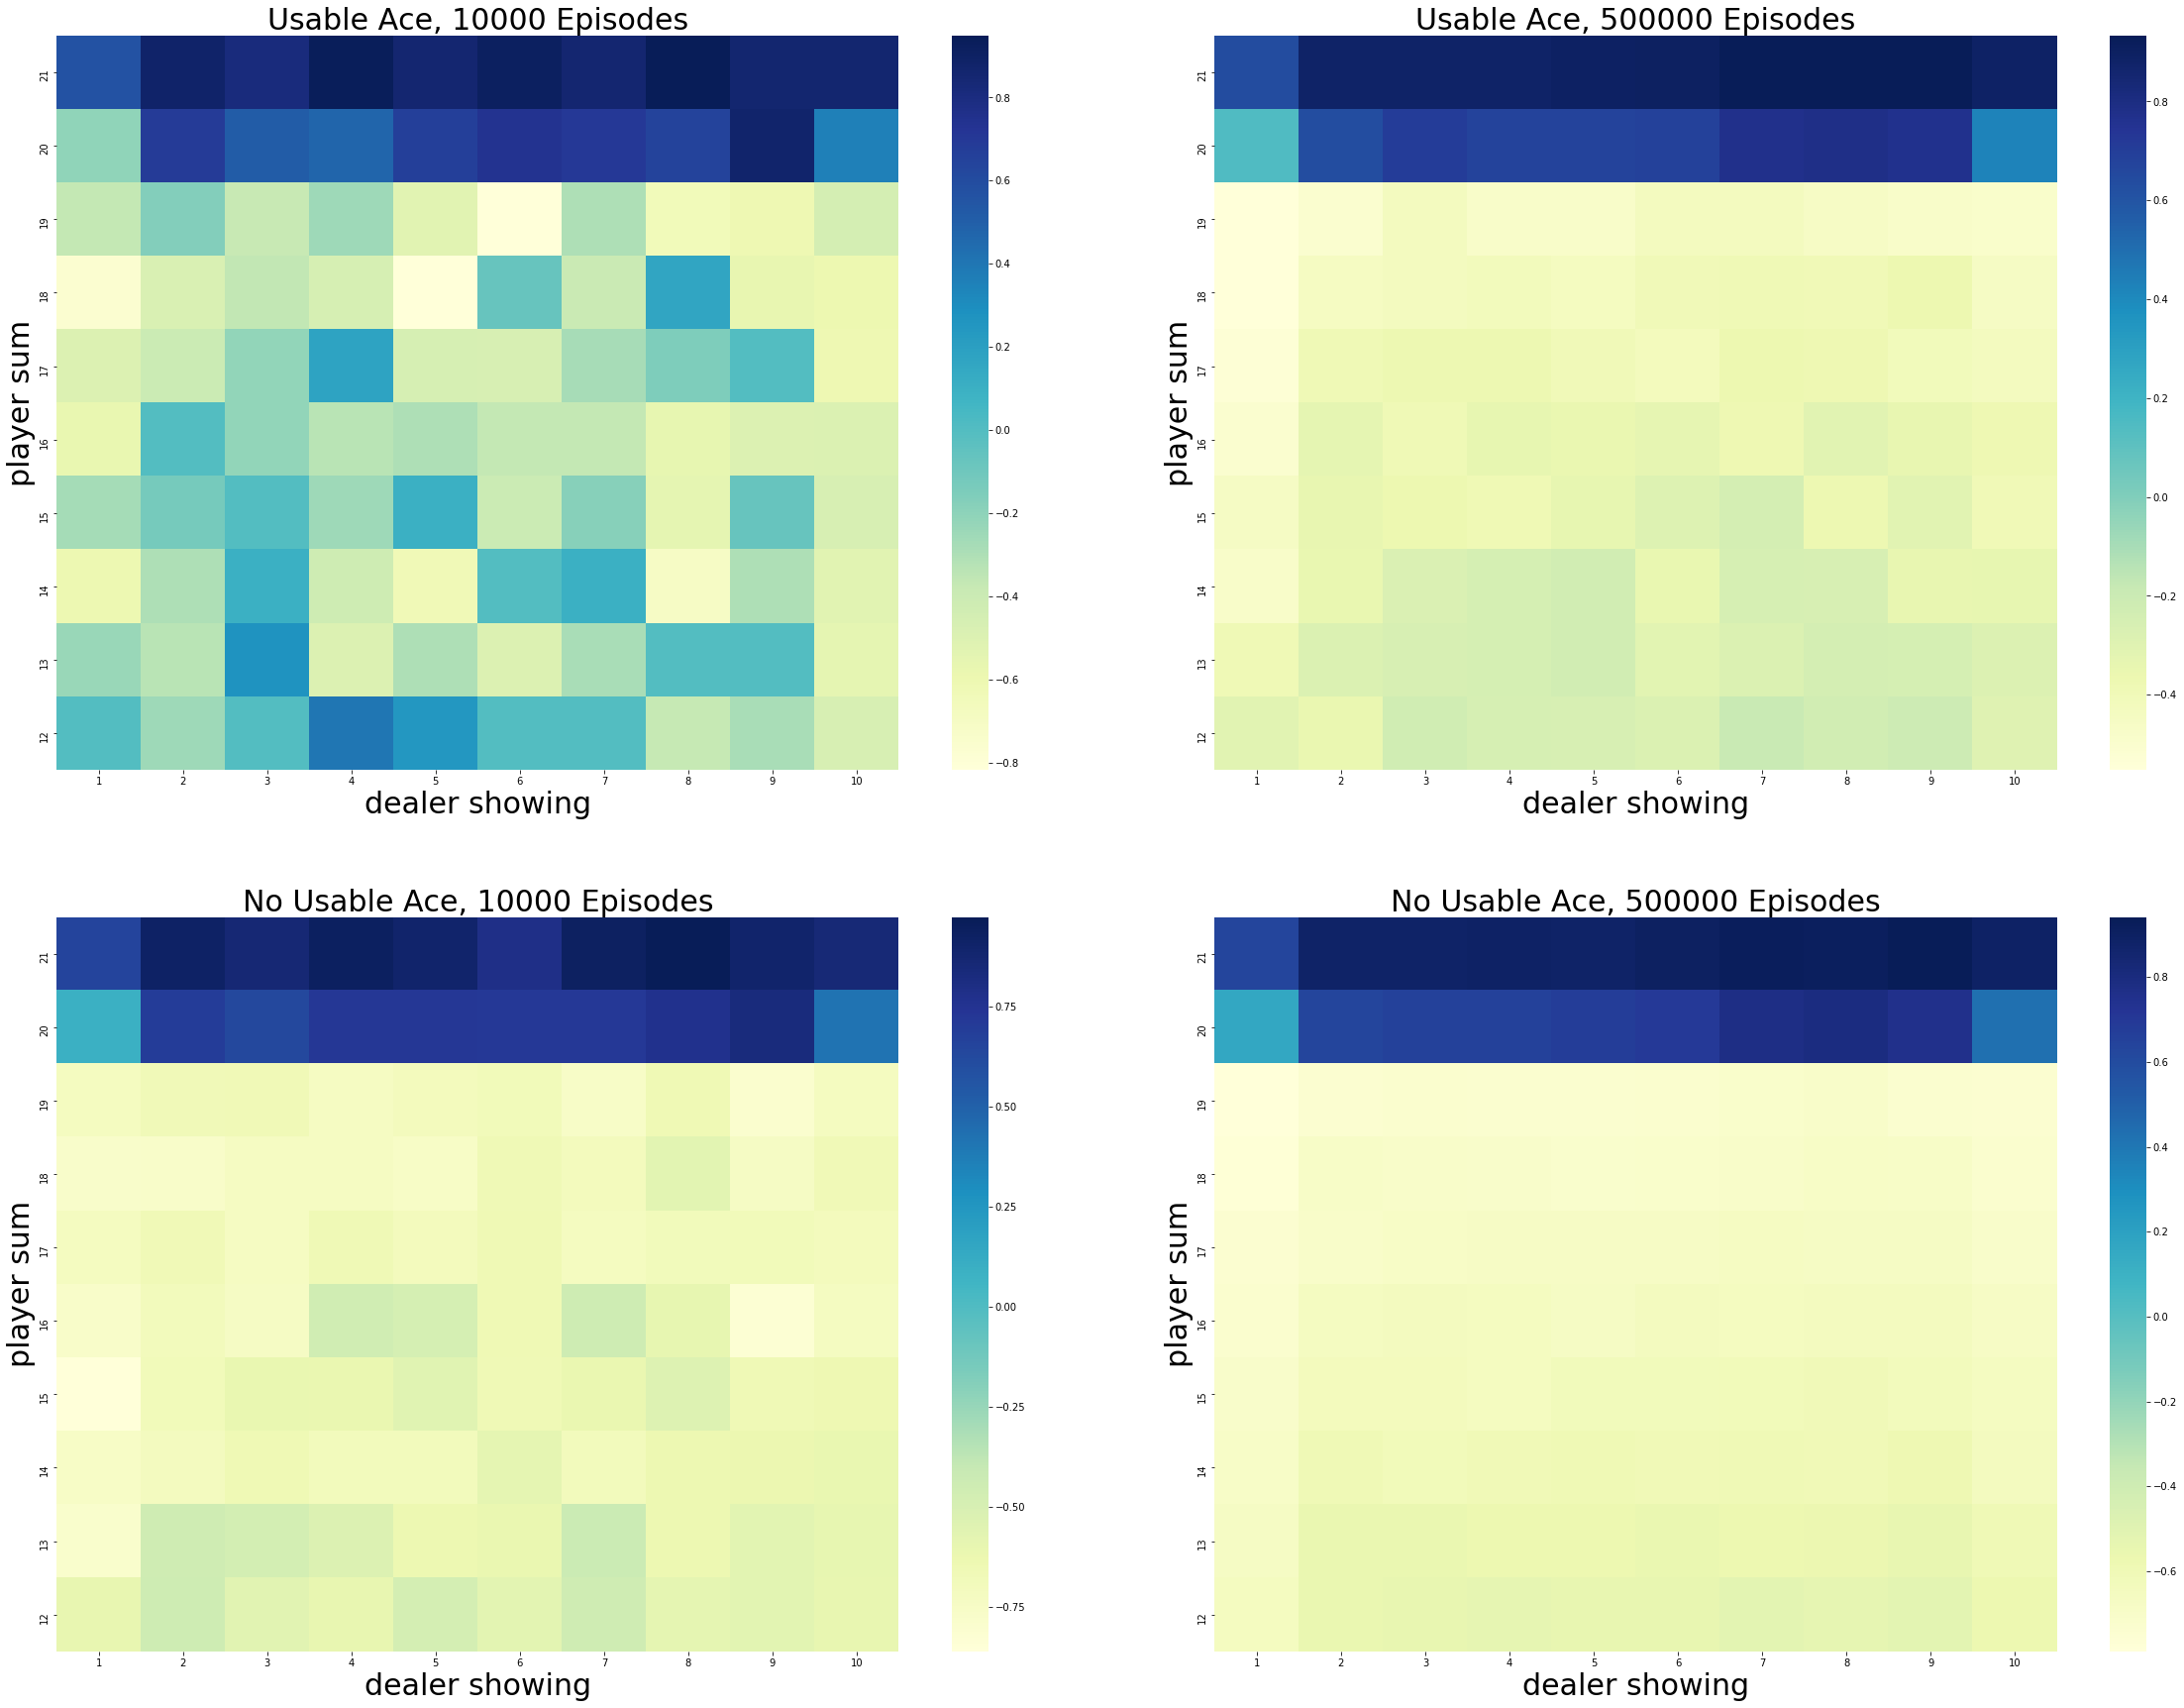

In [6]:
states_usable_ace_1, states_no_usable_ace_1 = monte_carlo_evaluation(10000)
states_usable_ace_2, states_no_usable_ace_2 = monte_carlo_evaluation(500000)

states = [states_usable_ace_1,
            states_usable_ace_2,
            states_no_usable_ace_1,
            states_no_usable_ace_2]

titles = ['Usable Ace, 10000 Episodes',
            'Usable Ace, 500000 Episodes',
            'No Usable Ace, 10000 Episodes',
            'No Usable Ace, 500000 Episodes']

_, axes = plt.subplots(2, 2, figsize=(40, 30))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

axes = axes.flatten()

for state, title, axis in zip(states, titles, axes):
    fig = sns.heatmap(np.flipud(state), cmap="YlGnBu", ax=axis, xticklabels=range(1, 11),
                      yticklabels=list(reversed(range(12, 22))))
    fig.set_ylabel('player sum', fontsize=30)
    fig.set_xlabel('dealer showing', fontsize=30)
    fig.set_title(title, fontsize=30)

### Challange
Make a good policy !! Good Luck!

# 4. Monte Carlo Estimation of Action Values


If the model of a system is not available, it’s better to estimate action values rather than state values. That’s because if we only have the state values we need to do a one-step lookahead that needs the model.

$$\pi(s) = \underset{a}{\mathrm{argmax}}\;\sum_{s',r} p(s', r \mid s, a) [r + \gamma v_{\pi}(s')]$$

Monte Carlo methods are primarily used to find an estimate of action value function, since if we have the q-value we don’t need the model to find the policy.

**Policy evaluation**

- *every visit MC*: estimates the value of q-value as the average of the returns that have followed all the visits to a state-action node
- *first visit MC*: same but taking only the first time the node has been visited in each episode


Problem: many state-action pairs may not be visited at all (for example if we have a deterministic policy). We must *assure continual exploration*.

**exploring starts**: one way to do it is to start each episode in a state-action pair, each having a non-zero probability of being selected.
Use a stochastic policy with non-zero probability of selecting each action

# 5. Monte Carlo Control

In this method, the overall idea is performing alternating complete steps of policy evaluation and policy improvement.

$$\pi_0 \overset{E}{\rightarrow} q_{\pi_0} \overset{I}{\rightarrow} \pi_1 \overset{E}{\rightarrow} q_{\pi_1} \overset{I}{\rightarrow} \pi_2 \overset{E}{\rightarrow} ... \overset{I}{\rightarrow} \pi_* \overset{E}{\rightarrow} q_{\pi_*}$$



$$\pi(s) \doteq \underset{a}{\mathrm{arg max}} \;q(s, a)$$

Policy improvement:

$$% <![CDATA[
\begin{align}
q_{\pi_k}(s, \pi_{k+1}) & = q_{\pi_k}(s, \underset{a}{\mathrm{argmax}}\;q_{\pi_k}(s, a)) \label{eq:5.3}\\
 & = \underset{a}{\mathrm{max}}\;q_{\pi_k}(s, a)\\
 & \geq q_{\pi_k}(s, \pi_k(s))\\
 & \geq v_{\pi_k}(s)
\end{align} %]]>$$


We make two assumptions to assure the convergence:

1. We do observe an infinite number of episodes
2. Episodes are generated with exploring starts

But, to obtain a practical algorithm we will have to remove both assumptions.

## 5.1.  Monte Carlo Control with Exploring Starts

**Removing the policy evaluation along an infinite number of episodes.**

- iterate policy evaluation until a threshold of convergence has been reached
- only make a fixed number of steps for policy evaluation (1 in value iteration)

For Monte Carlo methods it’s natural to alternate between evaluation and improvement on a per-episode basis. After each episode, the observed returns are used for policy evaluation, and then the policy is improved at all the states visited during the episode.

<img src="images/mc_es.png" style="width:800px">

### Exercise
Solve Blackjack problem with Monte Carlo ES
Remember:
1. Actions: Hit, Stand
2. **Policy of the Player**
3. Policy of the Dealer
4. Environment: Play(policy_player, initial_state=None, initial_action=None) -> [state, -1, player_trayectory]


In [7]:
# behavior policy is greedy
def behavior_policy(usable_ace, player_sum, dealer_card):
    usable_ace = int(usable_ace)
    player_sum -= 12
    dealer_card -= 1
    # get argmax of the average returns(s, a)
    values_ = state_action_values[player_sum, dealer_card, usable_ace, :] / \
              state_action_pair_count[player_sum, dealer_card, usable_ace, :]
    return np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

In [8]:
# (playerSum, dealerCard, usableAce, action)
state_action_values = np.zeros((10, 10, 2, 2))
# initialze counts to 1 to avoid division by 0
state_action_pair_count = np.ones((10, 10, 2, 2))

In [9]:
episodes=500000
for episode in tqdm(range(episodes)):
    # for each episode, use a randomly initialized state and action
    initial_state = [bool(np.random.choice([0, 1])),
                   np.random.choice(range(12, 22)),
                   np.random.choice(range(1, 11))]
    initial_action = np.random.choice(ACTIONS)
    current_policy = behavior_policy if episode else target_policy_player
    _, reward, trajectory = play(current_policy, initial_state, initial_action)
    first_visit_check = set()
    for (usable_ace, player_sum, dealer_card), action in trajectory:
        usable_ace = int(usable_ace)
        player_sum -= 12
        dealer_card -= 1
        state_action = (usable_ace, player_sum, dealer_card, action)
        if state_action in first_visit_check:
            continue
        first_visit_check.add(state_action)
        # update values of state-action pairs
        state_action_values[player_sum, dealer_card, usable_ace, action] += reward
        state_action_pair_count[player_sum, dealer_card, usable_ace, action] += 1

100%|██████████| 500000/500000 [00:51<00:00, 9704.10it/s] 


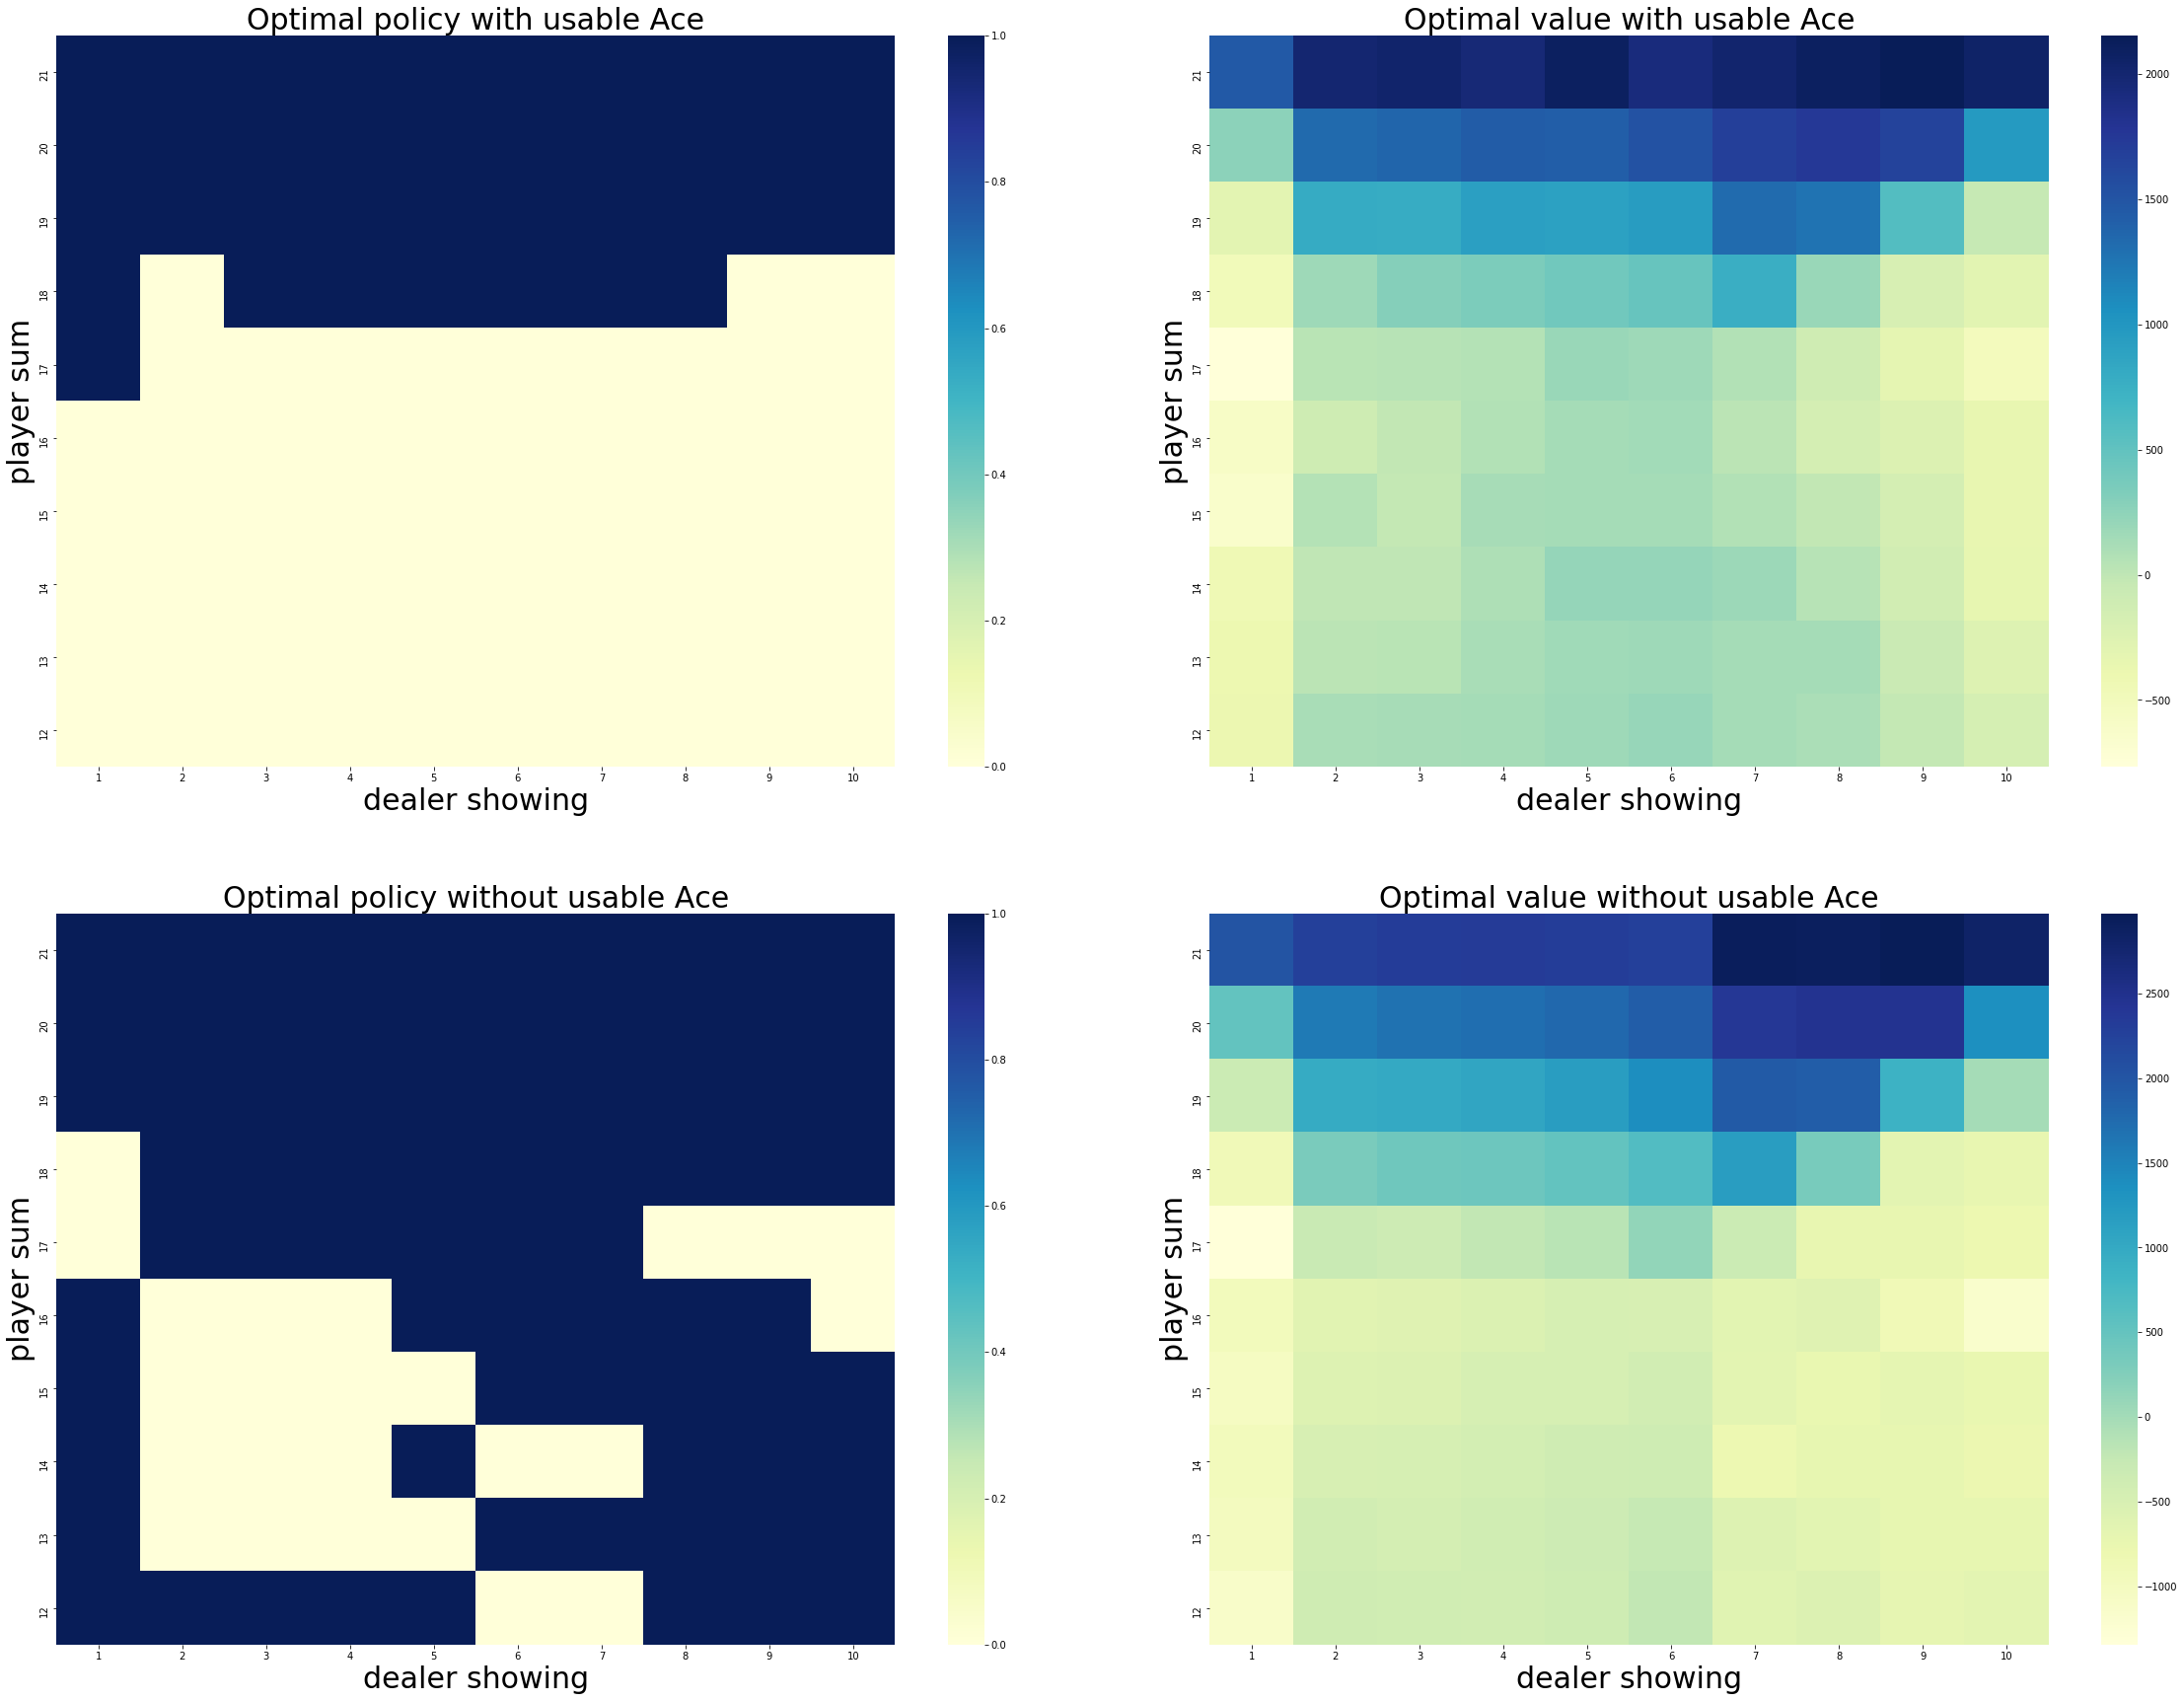

In [10]:
state_value_no_usable_ace = np.max(state_action_values[:, :, 0, :], axis=-1)
state_value_usable_ace = np.max(state_action_values[:, :, 1, :], axis=-1)

# get the optimal policy
action_no_usable_ace = np.argmax(state_action_values[:, :, 0, :], axis=-1)
action_usable_ace = np.argmax(state_action_values[:, :, 1, :], axis=-1)

images = [action_usable_ace,
          state_value_usable_ace,
          action_no_usable_ace,
          state_value_no_usable_ace]

titles = ['Optimal policy with usable Ace',
          'Optimal value with usable Ace',
          'Optimal policy without usable Ace',
          'Optimal value without usable Ace']

_, axes = plt.subplots(2, 2, figsize=(40, 30))
plt.subplots_adjust(wspace=0.1, hspace=0.2)
axes = axes.flatten()

for image, title, axis in zip(images, titles, axes):
    fig = sns.heatmap(np.flipud(image), cmap="YlGnBu", ax=axis, xticklabels=range(1, 11),
                      yticklabels=list(reversed(range(12, 22))))
    fig.set_ylabel('player sum', fontsize=30)
    fig.set_xlabel('dealer showing', fontsize=30)
    fig.set_title(title, fontsize=30)


## 5.2 Monte Carlo Control without Exploring Starts

From exploring starts to ensure that all actions are selected infinitely often

- **on-policy** methods: evaluate and improve the policy that is being used to make decisions
- **off-policy** methods: evaluate and improve a policy that is different that the one used to generate the data

### On policy control

Soft policies $\pi(s, a) > 0$.
However, gradually shifted closer and closer to a deterministic optimal policy, i.e. $\epsilon$-greedy policy, giving $\frac{\varepsilon}{\mid\mathcal{A}(s)\mid}$ to all non-greedy actions and $1 - \varepsilon + \frac{\varepsilon}{\mid\mathcal{A}(s)\mid}$ to the greedy actions.

The $\epsilon$-greedy policies are examples of $\epsilon$-soft policies, defined as policies for which $\pi(a|s)  \geq \frac{\varepsilon}{\mid\mathcal{A}(s)\mid}$ for all states and actions, for some $\epsilon > 0$


The overall idea of on-policy Monte Carlo control is still that of General Policy Improvement (GPI).

1. **Policy evaluation** we first-visit MC to estimate the action-value for current policy
2. **Policy improvement** we can't just make the policy greedy with respect to the current action-values because it would prevent exploration of non-greedy actions. Fortunately, GPI does not require that the policy be taken all the way to a greedy policy, only that it be moved towards a greedy policy.


<img src="images/onpolicy_first_visit_mc.png" style="width:800px">

# Summary


Monte Carlo methods learn value functions and optimal policies from experience in the form of sample episodes. This has advantages over DP methods:

We don’t need a model
We can use simulation or sample models
It’s easy to focus on a small subset of states
They don’t update their value estimate for a state based on estimates of successor states (no bootstrapping) thus they can be les harmed by violations of the Markov property
We still use GPI by mixing policy evaluation and policy improvement on an episode-by-episode basis, and for the policy evaluation part we simply average the returns for a given state instead of using the model to compute value for each state.

Exploration is an issue, that we can adress with:

- exploring starts
- off-policy methods...